### 探索梯度下降过程中的步长和迭代次数的关系

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


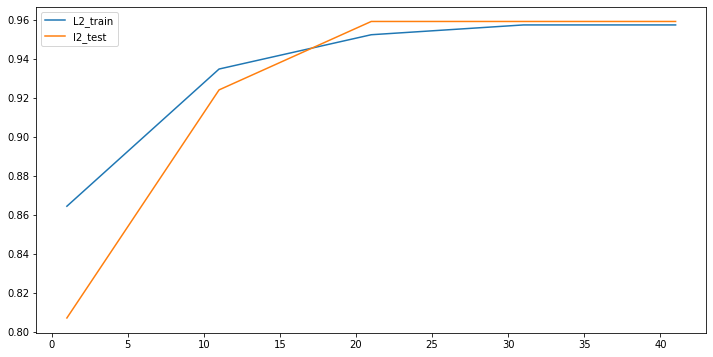

In [4]:
l2 = []
l2test = []

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

for i in range(1, 50, 10):
    lr = LR(penalty="l2"
            , solver="liblinear"
            , C=0.9
            , max_iter=i)
    lr = lr.fit(X_train, Y_train)
    l2.append(accuracy_score(lr.predict(X_train), Y_train))
    l2test.append(accuracy_score(lr.predict(X_test), Y_test))
    
plt.figure(figsize=(12, 6))
label = ["L2_train", "l2_test"]
data = [l2, l2test]

for i in range(len(data)):
    plt.plot(np.arange(1, 50, 10), data[i], label = label[i])
plt.legend()
plt.show()

In [5]:
lr.coef_

array([[ 1.72261265, -0.02106834,  0.13851682, -0.00846361, -0.11061491,
        -0.28376118, -0.51216079, -0.25491075, -0.1537168 , -0.01555036,
         0.03143149,  0.60191045,  0.03061066, -0.08795136, -0.01066598,
        -0.00935101, -0.05335214, -0.02761363, -0.03329993,  0.0038689 ,
         1.25229638, -0.17925537, -0.27197025, -0.01824967, -0.17118628,
        -0.83597966, -1.21802693, -0.4344283 , -0.51422196, -0.08104336]])

In [6]:
lr.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=41,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)>

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()

In [9]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
# 三分类
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
from sklearn.linear_model import LogisticRegression as LR

for multi_class in ("multinomial", "ovr"):
    clf = LR(solver="sag"
             , max_iter=100
             , random_state=10
             , multi_class=multi_class).fit(iris.data, iris.target)
    print("traing score : {}, muti_class : {}".format(clf.score(iris.data
                                                          , iris.target)
                                                , multi_class))

traing score : 0.9866666666666667, muti_class : multinomial
traing score : 0.96, muti_class : ovr


/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
